In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

In [19]:
from datetime import datetime

env = Environment(
    
    latitude=32.990278, 
    longitude=-106.969722, 
    elevation=1401,
    date=(2023, 12, 4, 12),
     
)
env.rail_length=7.0

In [10]:


env.set_date(
  (2023,12,4, 12),timezone="America/Denver") # Tomorrow's date in year, month, day, hour UTC format
env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of gravity at surface level:    9.7911 m/s²
Acceleration of gravity at   4.500 km (ASL): 9.7818 m/s²


Launch Site Details

Launch Date: 2023-12-04 19:00:00 UTC | 2023-12-04 12:00:00 America/Denver
Launch Site Latitude: 32.99028°
Launch Site Longitude: -106.96972°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315961.73 W    3651932.06 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1474.8 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 4.500 km
Forecast Time Period: From  2023-12-03 18:00:00  to  2023-12-19 18:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 1.46 m/s
Surface Wind Direction: 1.59°
Surface Wind Heading: 181.59°
Surface Pressure: 856.95 hPa
Surface Temperature: 285.42 K
Surface Air Density: 1.046 kg/m³
Surface Speed of Sound: 338.68 m

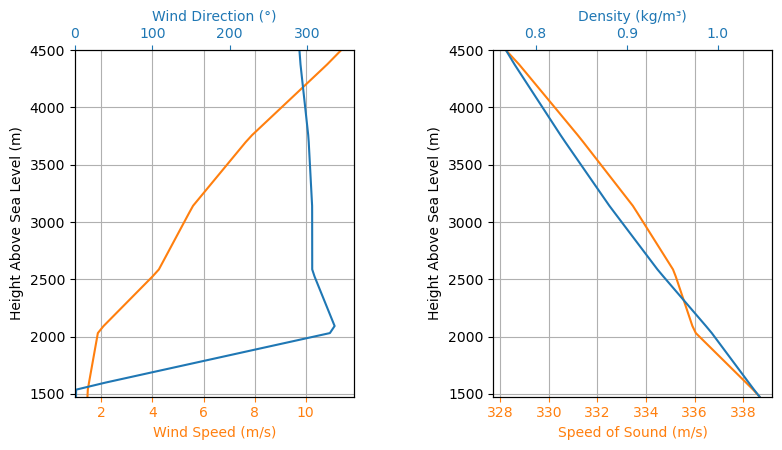

In [6]:
env.max_expected_height = 4500 # adjust the plots to this height
env.info()

In [11]:
Pro75M1670 = SolidMotor(
    thrust_source="Cesaroni_M1670.eng",
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Average Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns



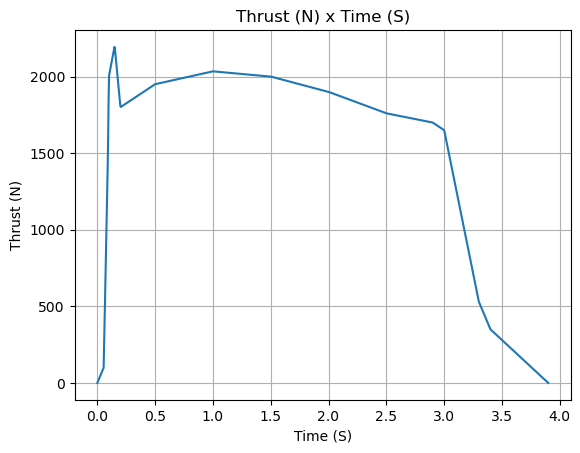

In [12]:
Pro75M1670.info()

In [13]:
calisto = Rocket(
    radius=127 / 2000,
    mass=14.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag="powerOffDragCurve.csv",
    power_on_drag="powerOnDragCurve.csv",
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)
buttons = calisto.set_rail_buttons(
    upper_button_position=0.0818,
    lower_button_position=-0.6182,
    angular_position=45,
)

calisto.add_motor(Pro75M1670, position=-1.255)

In [14]:
nose = calisto.add_nose(length=0.55829, kind="vonKarman", position=1.278)

fins = calisto.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.040,
    span=0.100,
    sweep_length=None,
    cant_angle=0,
    position=-1.04956,)

tail = calisto.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656)

In [15]:
main = calisto.add_parachute(
    name="main",
    cd_s=10.0,
    trigger=500,      # ejection altitude in meters
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

drogue = calisto.add_parachute(
    name="drogue",
    cd_s=1.0,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

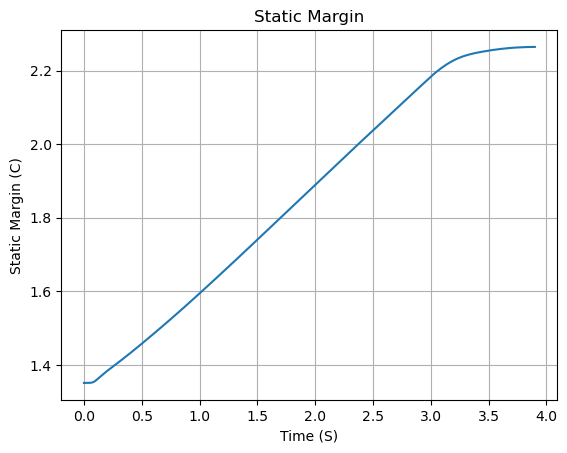

In [16]:
calisto.plots.static_margin()

In [17]:
test_flight = Flight(
    rocket=calisto, environment=env, rail_length=5.2, inclination=85, heading=0
    )


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1474.76 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: -1.46 m/s
Lateral Surface Wind Speed: 0.04 m/s


Launch Rail

Launch Rail Length: 5.2  m
Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.368 s
Rail Departure Velocity: 26.207 m/s
Rail Departure Stability Margin: 1.430 c
Rail Departure Angle of Attack: 3.163°
Rail Departure Thrust-Weight Ratio: 10.152
Rail Departure Reynolds Number: 1.972e+05


Burn out State

Burn out time: 3.900 s
Altitude at burn out: 656.663 m (AGL)
Rocket velocity at burn out: 280.118 m/s
Freestream velocity at burn out: 280.366 m/s
Mach Number at burn out: 0.835
Kinetic energy at burn ou

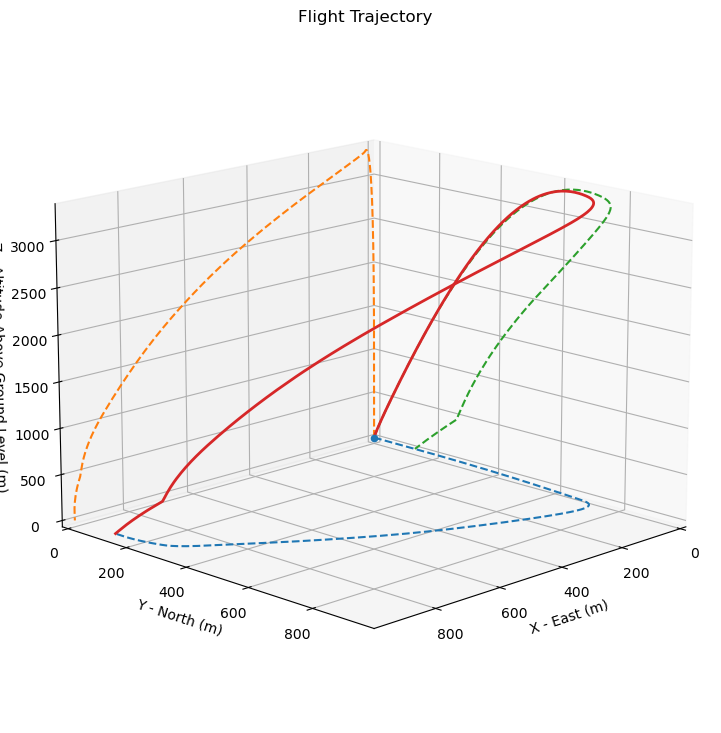



Trajectory Kinematic Plots



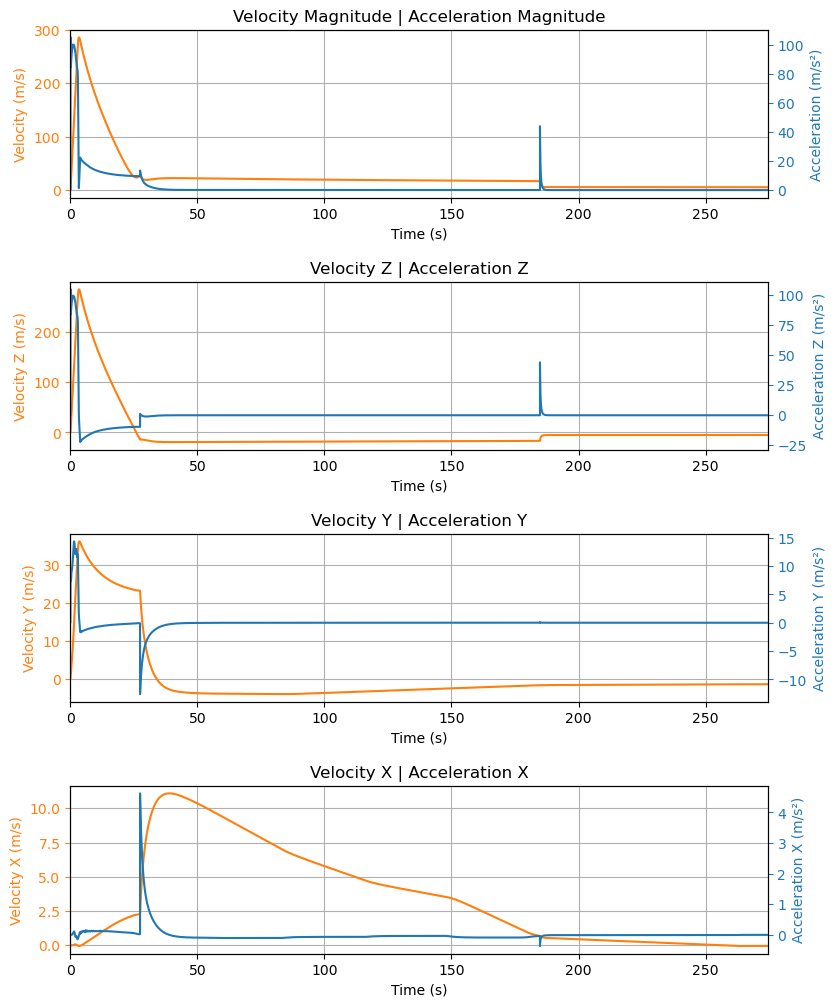



Angular Position Plots



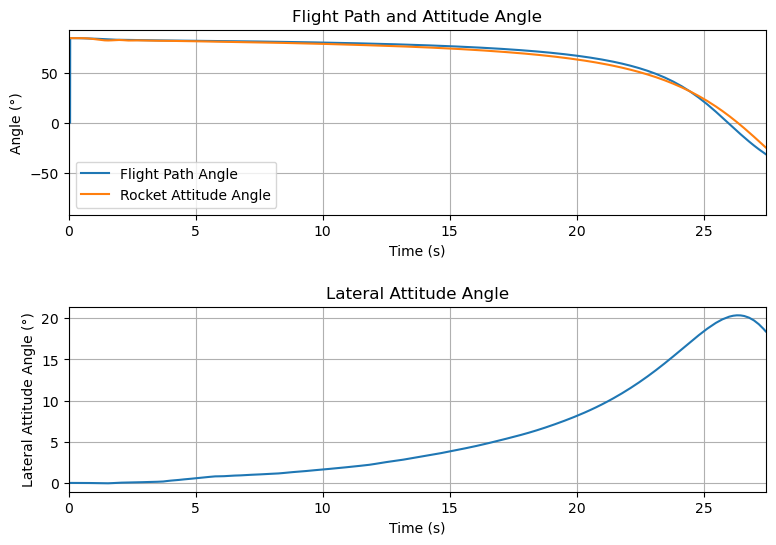



Path, Attitude and Lateral Attitude Angle plots



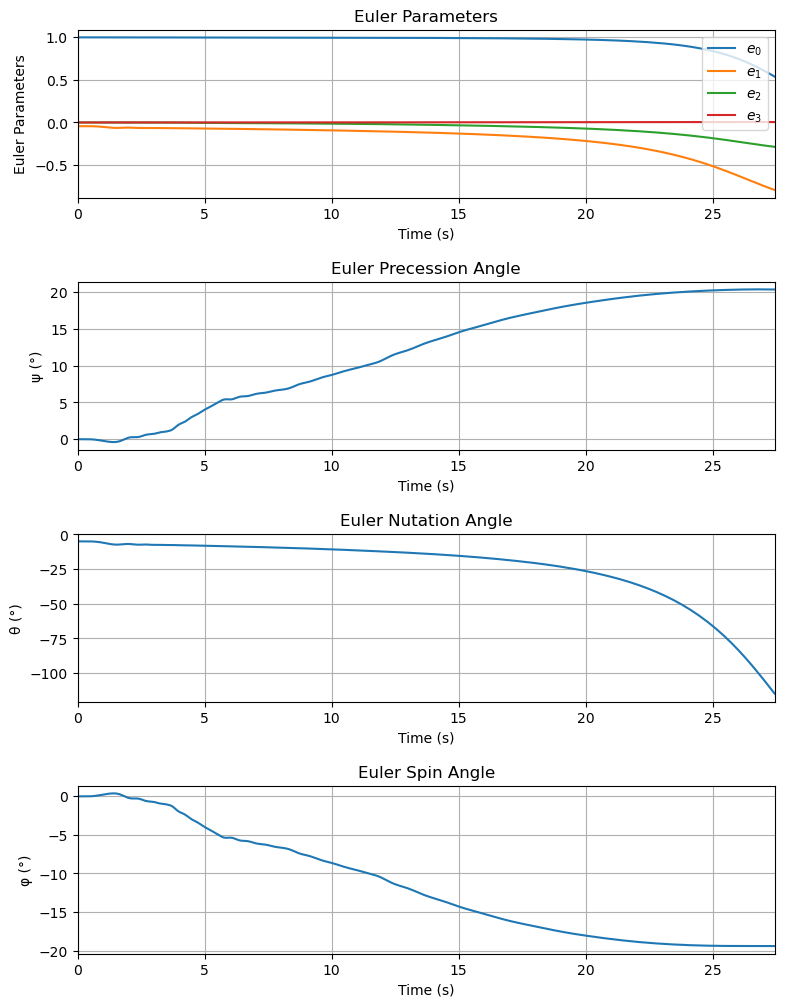



Trajectory Angular Velocity and Acceleration Plots



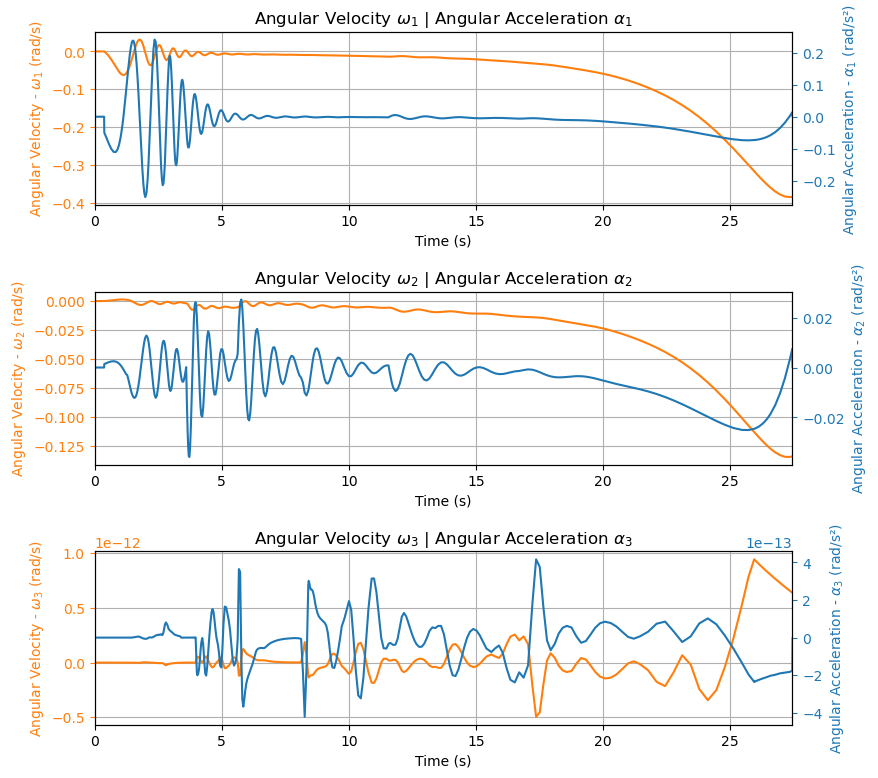



Aerodynamic Forces Plots



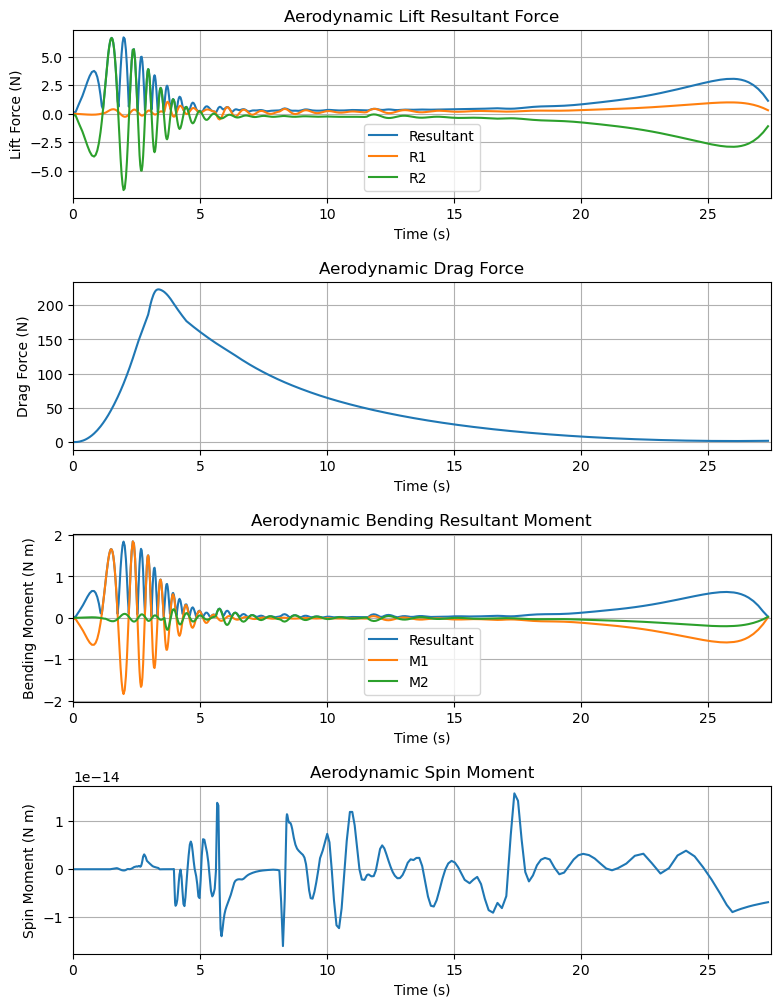



Rail Buttons Forces Plots



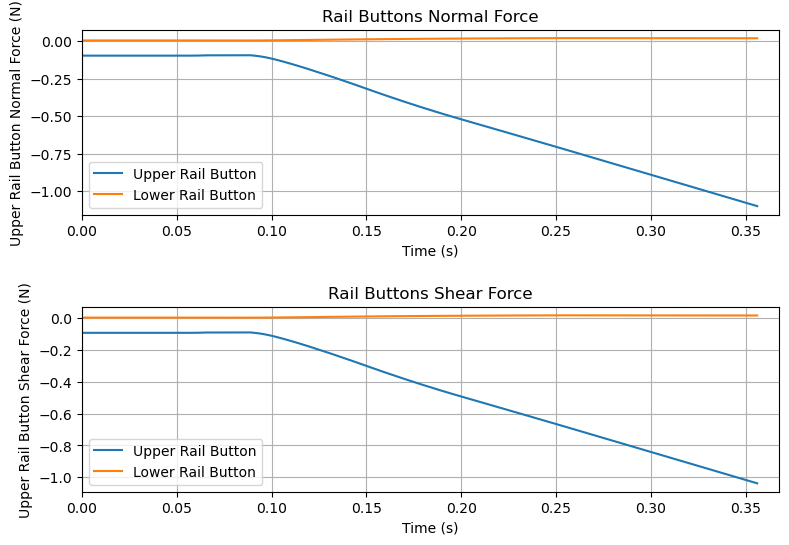



Trajectory Energy Plots



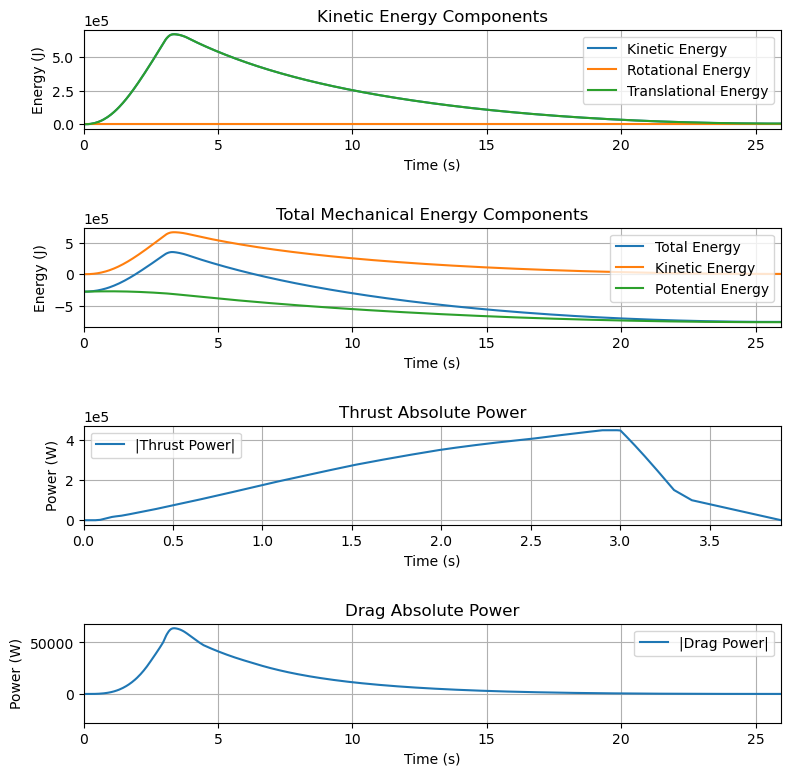



Trajectory Fluid Mechanics Plots



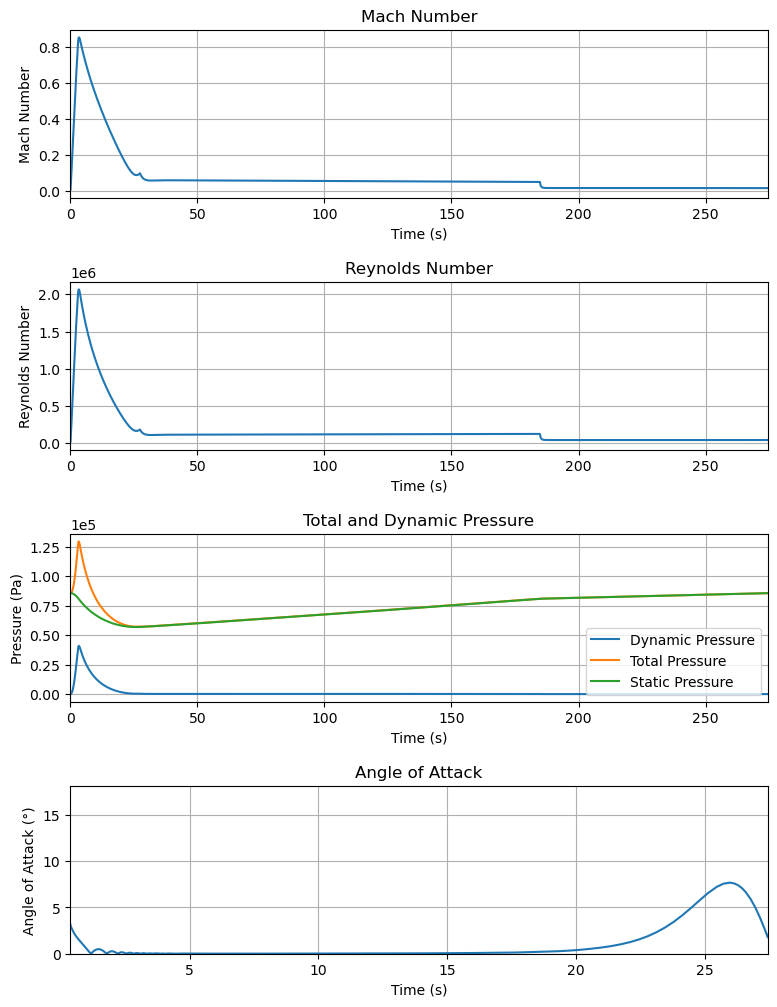



Trajectory Stability and Control Plots



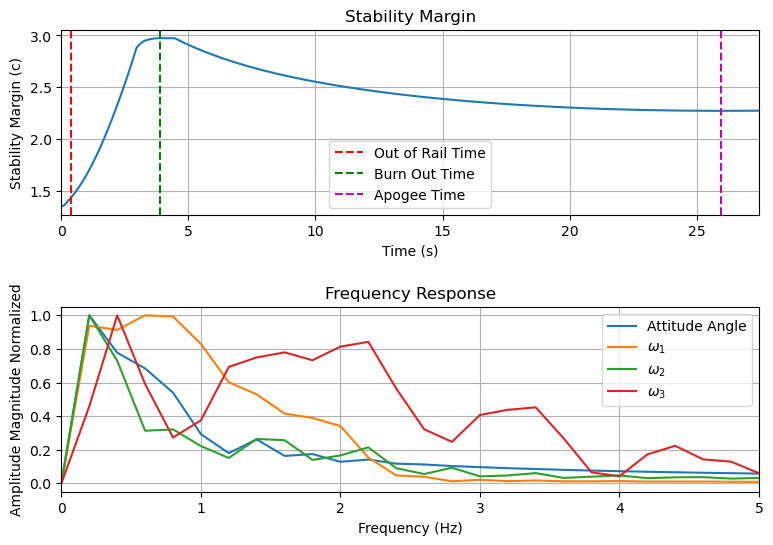



Rocket and Parachute Pressure Plots



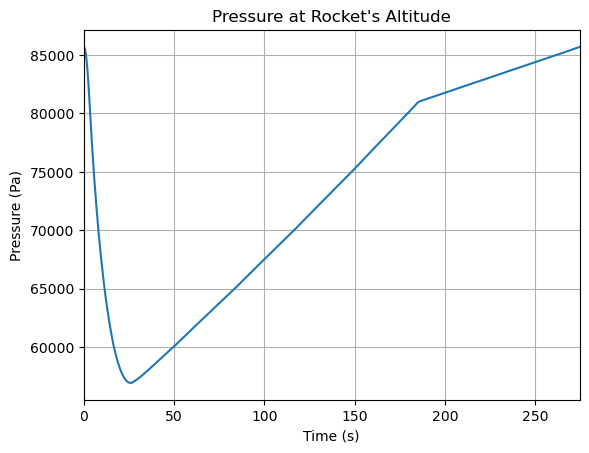


Parachute:  main


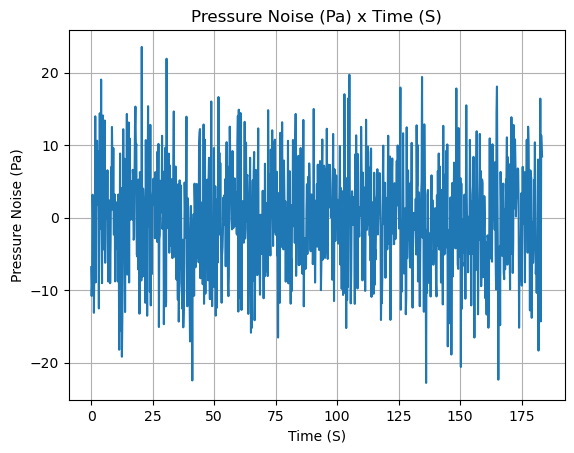

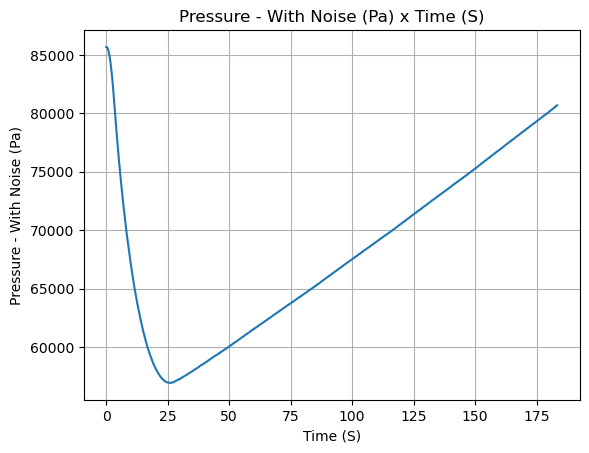

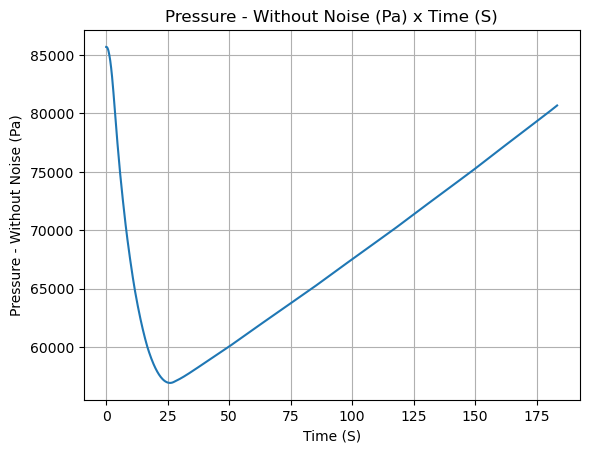


Parachute:  drogue


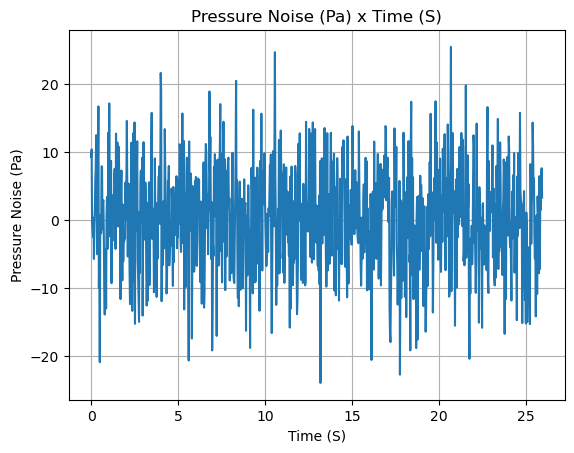

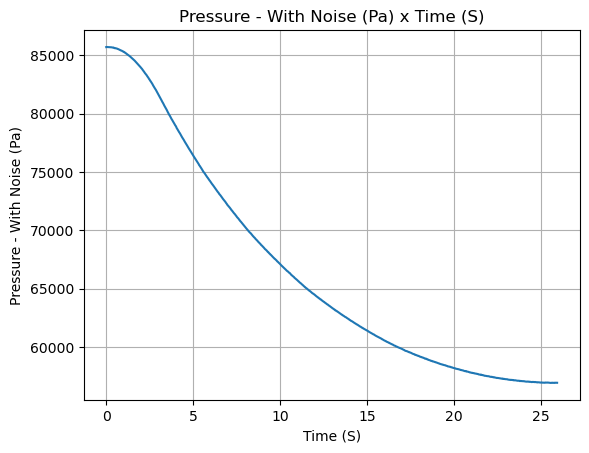

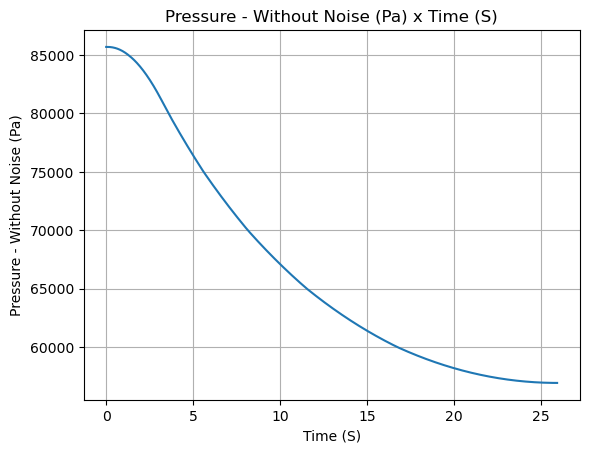

In [18]:
test_flight.all_info()